## Лабораторна робота №10 Жадібна стратегія на прикладі кодування Гафмена
## Виконав: Буханцев Максим

## 1. Побудувати дерево кодів Гафмена згідно з варіантом індивідуального завдання практичної роботи № 9, виданим викладачем вручну і візуалізувати дерево.

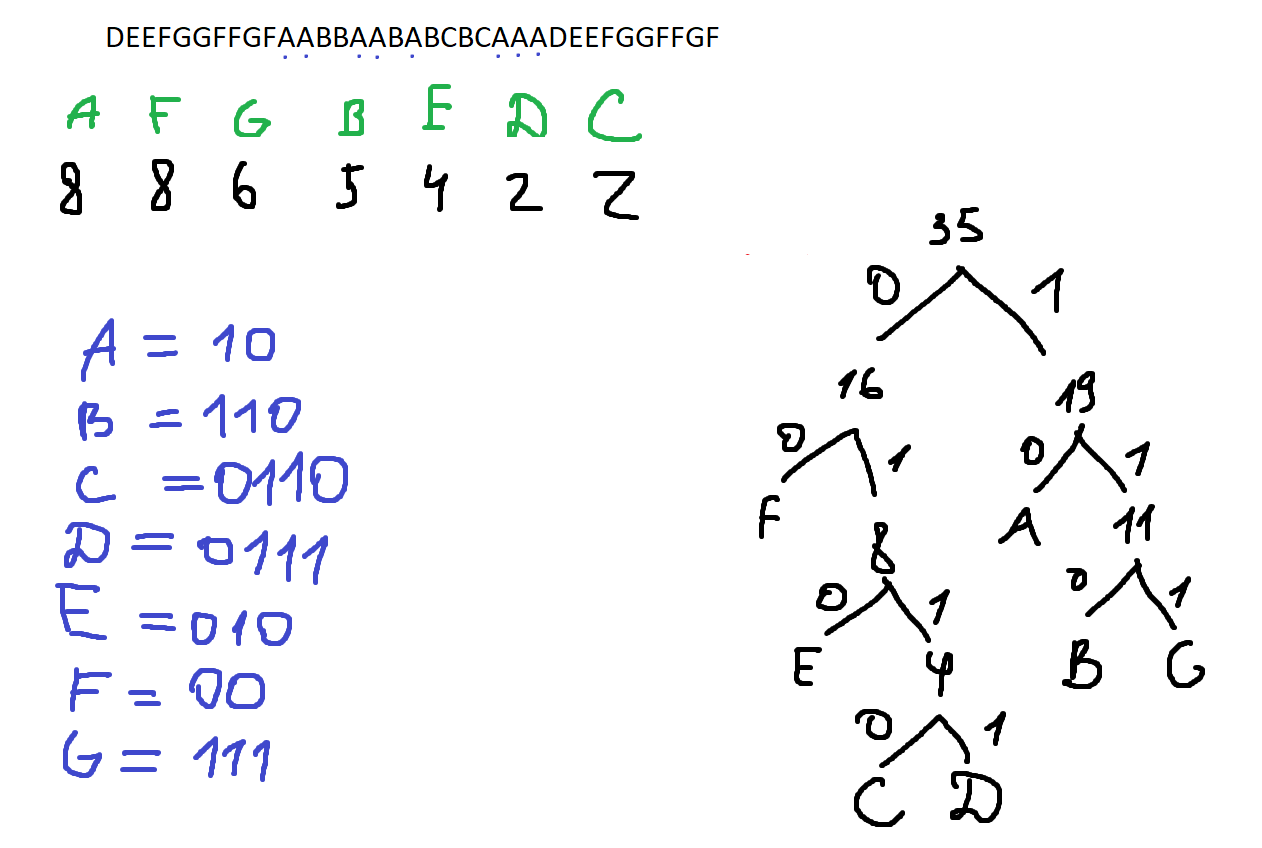

## 2. Перевірити результат за допомогою коду.

In [19]:
import heapq

class node:
    def __init__(self, freq, symbol, left=None, right=None):
        # частота символу
        self.freq = freq

        self.symbol = symbol

        self.left = left

        self.right = right

        self.huff = ''

    def __lt__(self, nxt):
        return self.freq < nxt.freq

def printNodes(node, val=''):
    # Код Гафмена для поточного вузла
    newVal = val + str(node.huff)


    if(node.left):
        printNodes(node.left, newVal)
    if(node.right):
        printNodes(node.right, newVal)

    # якщо node є реберною вершиною тоді
    # вивести його хаффманівський код
    if(not node.left and not node.right):
        print(f"{node.symbol} -> {newVal}")

# символи для дерева Гафмена
chars = ['f', 'a', 'g', 'b', 'e','c','d']

# частота символів
freq = [8, 8, 6, 5, 4, 2, 2]

# список, що містить невикористані вершини
nodes = []

# перетворення символів та частот
# у вузли дерева Гафмена
for x in range(len(chars)):
    heapq.heappush(nodes, node(freq[x], chars[x]))

while len(nodes) > 1:
    # відсортувати всі вершини за зростанням
    # на основі їх частоти
    left = heapq.heappop(nodes)
    right = heapq.heappop(nodes)

    # присвоїти значення напрямку цим вузлам
    left.huff = 0
    right.huff = 1

    # об'єднати 2 найменші вершини, щоб створити
    # новий вузол як їхній батько
    newNode = node(left.freq+right.freq, left.symbol+right.symbol, left, right)
    heapq.heappush(nodes, newNode)

# Друк кодів Гафмена
printNodes(nodes[0])

f -> 00
e -> 010
c -> 0110
d -> 0111
a -> 10
b -> 110
g -> 111


## 3. Написати процедуру на Python, яка для вхідного повідомлення обчислює список символів chars та список їх частот freq.

In [21]:
def get_char_freq(text):
    counter = Counter(text)
    chars = list(counter.keys())
    freqs = list(counter.values())
    return chars, freqs

chars, freqs = get_char_freq(text)
print("chars:", chars)
print("freqs:", freqs)

chars: ['D', 'E', 'F', 'G', 'A', 'B', 'C']
freqs: [2, 4, 8, 6, 8, 5, 2]


## 4. Декодувати повідомлення, задане варіантом.

In [25]:
import heapq
from collections import defaultdict

codes = {}

freq = defaultdict(int)

# A Huffman tree node
class MinHeapNode:
    def __init__(self, data, freq):
        self.left = None
        self.right = None
        self.data = data
        self.freq = freq

    def __lt__(self, other):
        return self.freq < other.freq

def printCodes(root, str):
    if root is None:
        return
    if root.data != '$':
        print(root.data, ":", str)
    printCodes(root.left, str + "0")
    printCodes(root.right, str + "1")

def storeCodes(root, str):
    if root is None:
        return
    if root.data != '$':
        codes[root.data] = str
    storeCodes(root.left, str + "0")
    storeCodes(root.right, str + "1")

def HuffmanCodes(size):
    global minHeap
    for key in freq:
        minHeap.append(MinHeapNode(key, freq[key]))
    heapq.heapify(minHeap)
    while len(minHeap) != 1:
        left = heapq.heappop(minHeap)
        right = heapq.heappop(minHeap)
        top = MinHeapNode('$', left.freq + right.freq)
        top.left = left
        top.right = right
        heapq.heappush(minHeap, top)
    storeCodes(minHeap[0], "")

# utility function to store map each character with its
# frequency in input string
def calcFreq(str, n):
    for i in range(n):
        freq[str[i]] += 1

def decode_file(root, s):
    ans = ""
    curr = root
    n = len(s)
    for i in range(n):
        if s[i] == '0':
            curr = curr.left
        else:
            curr = curr.right

        # reached leaf node
        if curr.left is None and curr.right is None:
            ans += curr.data
            curr = root
    return ans + '\0'

# Driver code
if __name__ == "__main__":
    minHeap = []
    str = "DEEFGGFFGFAABBAABABCBCAAADEEFGGFFGF"
    encodedString, decodedString = "", ""
    calcFreq(str, len(str))
    HuffmanCodes(len(str))
    print("Character With there Frequencies:")
    for key in sorted(codes):
        print(key, codes[key])

    for i in str:
        encodedString += codes[i]

    print("\nEncoded Huffman data:")
    print(encodedString)

    # Function call
    decodedString = decode_file(minHeap[0], encodedString)
    print("\nDecoded Huffman Data:")
    print(decodedString)

Character With there Frequencies:
A 00
B 110
C 0110
D 0111
E 010
F 10
G 111

Encoded Huffman data:
011101001010111111101011110000011011000001100011001101100110000000011101001010111111101011110

Decoded Huffman Data:
DEEFGGFFGFAABBAABABCBCAAADEEFGGFFGF 


## 5. Контрольні питання

1. Що таке жадібні алгоритми? **Це алгоритми, які приймають на кожному кроці найкраще локальне рішення, сподіваючись отримати глобально оптимальний результат.**
2. Що таке префіксний код? Який код використовується у коді Гафмена? **Префіксний код — це код, у якому жоден код слова не є префіксом іншого. У коді Гафмена використовується саме префіксний код.**
3. Як пов’язана структура даних «купа» зі структурою даних «черга з пріоритетами»? **Купа — це реалізація черги з пріоритетами, де доступ до елементів визначається їх пріоритетом (найменший або найбільший).**
4. Що таке стиснення даних і для чого воно використовується? Які його головні переваги? **Стиснення — це зменшення розміру даних для економії пам’яті чи швидшої передачі. Переваги: зниження обсягів зберігання та часу передавання.**
5. Які кроки необхідно виконати для стиснення даних за допомогою алгоритму кодування Гафмена? **1) Обчислити частоти символів, 2) Побудувати дерево Гафмена, 3) Отримати коди, 4) Закодувати дані.**
6. Які головні обмеження та недоліки алгоритму кодування Гафмена? Чи можливо покращити його продуктивність? **Недоліки: неефективний при близьких частотах, статичність. Покращення можливе через адаптивне кодування або комбінування з іншими методами.**
7. Які існують альтернативні методи стиснення даних, що можуть конкурувати з алгоритмом Гафмена? **Алгоритми: LZW, RLE, аріфметичне кодування, Deflate (gzip). Вони іноді ефективніші.**
8. Які практичні застосування можуть мати алгоритми стиснення даних, зокрема алгоритм Гафмена, у сучасних інформаційних ситемах? **Стиснення файлів, передача даних по мережі, зберігання мультимедіа (аудіо, відео), PDF, архіватори (ZIP).**